In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
a=pd.read_csv("/content/Admission_Prediction (2).csv")

In [ ]:
a.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [4]:
a.shape

(500, 9)

In [5]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [6]:
a.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [7]:
a["GRE Score"].mode()

0    312.0
1    324.0
dtype: float64

In [8]:
a["GRE Score"].fillna(a["GRE Score"].mode()[0],inplace=True)

In [9]:
a["GRE Score"].mode()

0    312.0
dtype: float64

In [10]:
a.isnull().sum()

Serial No.            0
GRE Score             0
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [11]:
a["TOEFL Score"].fillna(a["TOEFL Score"].mode()[0],inplace=True)

In [12]:
a["University Rating"].fillna(a["University Rating"].mean(),inplace=True)

In [14]:
a

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,312.0,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


In [15]:
a.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [16]:
x=a.drop(["Chance of Admit","Serial No."],axis=1)

In [17]:
y=a["Chance of Admit"]

In [18]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1
2,312.0,104.0,3.0,3.0,3.5,8.00,1
3,322.0,110.0,3.0,3.5,2.5,8.67,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.0,108.0,5.0,4.5,4.0,9.02,1
496,337.0,117.0,5.0,5.0,5.0,9.87,1
497,330.0,120.0,5.0,4.5,5.0,9.56,1
498,312.0,103.0,4.0,4.0,5.0,8.43,0


In [19]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

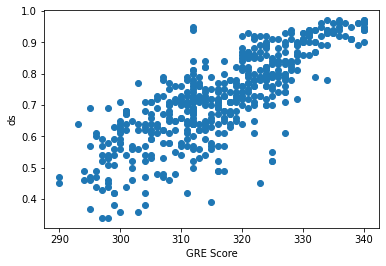

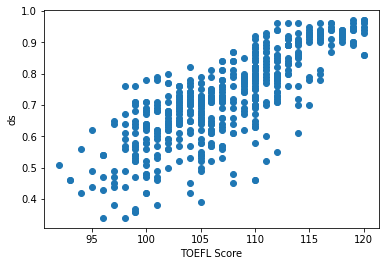

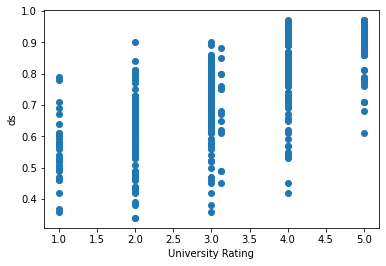

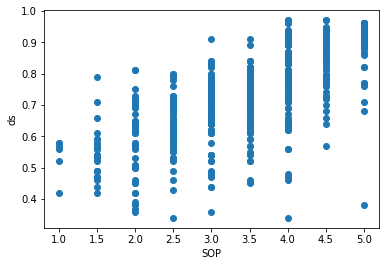

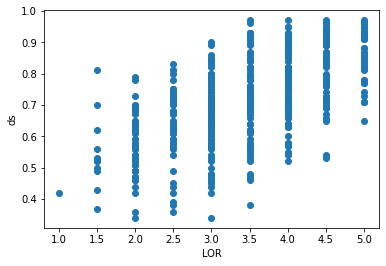

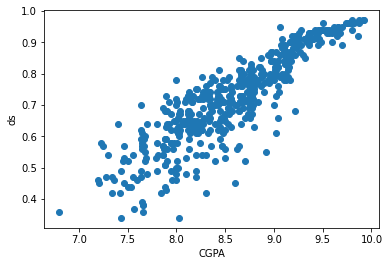

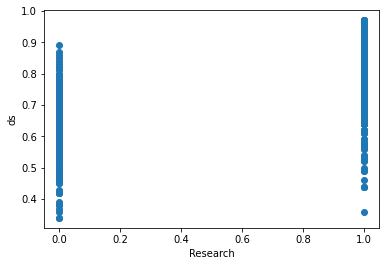

In [20]:
for i in x.columns:
    if(i != ["Chance Of Admit"]):
        plt.scatter(x[i],y)
        plt.xlabel(i)
        plt.ylabel("ds")
        plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler_feature=StandardScaler()

In [23]:
scaler_label=StandardScaler()

In [24]:
scaled_data=scaler_feature.fit_transform(x)

In [25]:
scaled_data

array([[ 1.85052822,  1.77547686,  0.77890565, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.68147064, -0.04027672,  0.77890565, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.39765943, -0.53548224, -0.1078766 , ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.22103568,  2.10561387,  1.66568791, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.39765943, -0.70055074,  0.77890565, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.95125316,  0.95013432,  0.77890565, ...,  1.09894429,
         0.76721964, -1.12815215]])

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=100)

In [28]:
#fitting the data into linear regression
from sklearn.linear_model import LinearRegression

In [29]:
reg=LinearRegression()

In [30]:
reg.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
from sklearn.metrics import r2_score

In [32]:
score=r2_score(reg.predict(test_x),test_y)

In [33]:
score

0.8076993525686703

In [34]:
reg.predict(test_x)

array([0.85868396, 0.47100161, 0.6280096 , 0.44578053, 0.64598598,
       0.85398867, 0.58423805, 0.6708053 , 0.81576593, 0.68391898,
       0.66322789, 0.60710496, 0.89390747, 0.76122405, 0.63653857,
       0.50101692, 0.5932031 , 0.74550918, 0.56026094, 0.71477719,
       0.89825968, 0.60985982, 0.85096431, 0.82326697, 0.99808338,
       0.60354515, 0.68321824, 0.93662411, 0.87713203, 0.70043558,
       0.78420399, 0.85380635, 0.7502154 , 0.55268936, 0.73961435,
       0.78262859, 0.79567973, 0.57756558, 0.54007331, 0.70184561,
       0.94815906, 0.58454502, 0.83942492, 0.78608391, 0.8110905 ,
       0.54729563, 0.59557674, 0.87410501, 0.95154098, 0.59880994,
       0.81659257, 0.70920574, 0.80814867, 0.99084397, 0.64359316,
       0.85476613, 0.6179743 , 0.89711609, 0.76941624, 0.73447114,
       0.68813814, 0.62390397, 0.47604256, 0.8832669 , 0.64759615,
       0.68476495, 0.70437717, 0.45943371, 0.84033595, 0.84308359,
       0.92763891, 0.77439541, 0.65730255, 0.83786836, 0.64625

In [35]:
import pickle

In [36]:
filename="first_model.pickle"
pickle.dump(reg,open(filename,"wb"))

In [37]:
load_model=pickle.load(open(filename,"rb"))

In [38]:
a=load_model.predict([[300,110,5,5,5,10,1]])

In [39]:
a

array([0.93409108])

In [40]:
reg.predict([[330,110,5,4,5,10,0]])

array([0.94890342])

In [41]:
from sklearn.linear_model import Ridge

In [42]:
rd=Ridge()

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
parameters={"alpha":[1e-3,3,4,6,7,8,6,100,200]}

In [45]:
a=GridSearchCV(rd,parameters,scoring="neg_mean_squared_error",cv=5)

In [46]:
a

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 3, 4, 6, 7, 8, 6, 100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [47]:
a.fit(train_x,train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 3, 4, 6, 7, 8, 6, 100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [48]:
a.predict(test_x)

array([0.85868418, 0.47100492, 0.62801084, 0.44578137, 0.64599019,
       0.85398939, 0.58424036, 0.67080637, 0.81576459, 0.68391444,
       0.66322804, 0.60710554, 0.89390641, 0.7612242 , 0.63653871,
       0.50101965, 0.59320424, 0.7455075 , 0.56026225, 0.71477853,
       0.89825893, 0.60986208, 0.85096595, 0.82326676, 0.99808171,
       0.60354603, 0.68321955, 0.93662292, 0.87713205, 0.70043823,
       0.78420378, 0.85380573, 0.75021386, 0.55269268, 0.73961431,
       0.78262923, 0.79567836, 0.57756655, 0.54007291, 0.70184811,
       0.94815932, 0.58454791, 0.83942528, 0.7860826 , 0.81109007,
       0.54729422, 0.59557879, 0.87410803, 0.9515395 , 0.59881132,
       0.81659318, 0.70920733, 0.80814661, 0.99084291, 0.64359491,
       0.85476554, 0.61797466, 0.89711733, 0.76941571, 0.73446974,
       0.68813817, 0.62390402, 0.47604562, 0.88326652, 0.64759619,
       0.68476518, 0.70437552, 0.4594349 , 0.84033705, 0.8430831 ,
       0.92763845, 0.77439664, 0.65730029, 0.83787031, 0.64626